# Imports

In [116]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import sklearn as skl

# Load Data

In [117]:
df=pd.read_csv('./Cleaned_dataset.csv')

In [118]:
df.head()

,Unnamed: 0,Time,Source,Destination,Protocol,Length,Type,Type of attack
0,0,0.000000,0,0,0,42,0,0
1,1,0.002956,1,1,0,42,0,0
2,2,0.200725,0,0,0,42,0,0
3,3,0.202713,2,2,1,85,1,1
4,4,0.411565,1,1,0,42,0,0


In [119]:
df.columns

Index(['Unnamed: 0', 'Time', 'Source', 'Destination', 'Protocol', 'Length',
       'Type', 'Type of attack'],
      dtype='object')

In [120]:
df.drop('Unnamed: 0',inplace=True,axis=1)

In [121]:
df.head()

,Time,Source,Destination,Protocol,Length,Type,Type of attack
0,0.000000,0,0,0,42,0,0
1,0.002956,1,1,0,42,0,0
2,0.200725,0,0,0,42,0,0
3,0.202713,2,2,1,85,1,1
4,0.411565,1,1,0,42,0,0


In [122]:
x=df.drop(['Type','Type of attack','Time'],axis=1).values
y1=df.drop(['Time', 'Source', 'Destination', 'Protocol', 'Length','Type of attack'],axis=1).values#type
y2=df.drop(['Time', 'Source', 'Destination', 'Protocol', 'Length','Type'],axis=1).values#type of attack

# Split Data into Binary and Multi-Class

In [123]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x,y1,test_size=0.2,random_state=1234)
x2_train,x2_test,y2_train,y2_test=train_test_split(x,y2,test_size=0.2,random_state=1234)

In [124]:
lr=LogisticRegression()
dtr=DecisionTreeClassifier()
svm=SVC(gamma='auto')

lr.fit(x1_train,y1_train.ravel())
dtr.fit(x1_train,y1_train.ravel())
svm.fit(x1_train,y1_train.ravel())



SVC(gamma='auto')

## Logistic Regression Binary Classification

In [125]:
print('Train Accuracy',lr.score(x1_train,y1_train))
print('Test Accuracy:',lr.score(x1_test,y1_test))

Train Accuracy 0.8832124992974766
Test Accuracy: 0.8870605161406349


In [126]:
print(skl.metrics.classification_report(y1_test,lr.predict(x1_test),target_names=['Attack','Normal']))

              precision    recall  f1-score   support

      Attack       0.89      0.98      0.93     17662
      Normal       0.87      0.53      0.66      4580

    accuracy                           0.89     22242
   macro avg       0.88      0.76      0.80     22242
weighted avg       0.89      0.89      0.88     22242



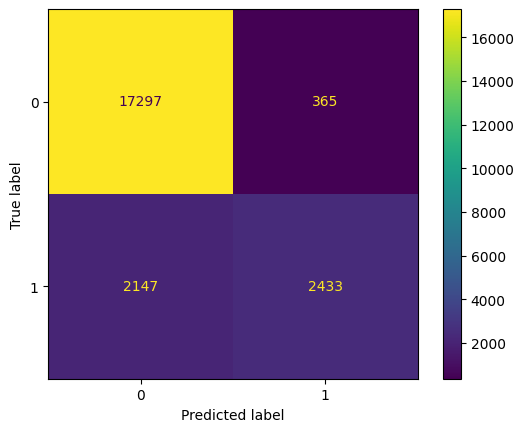

In [127]:
cm_lr=skl.metrics.confusion_matrix(y_true=y1_test,y_pred=lr.predict(x1_test))
skl.metrics.ConfusionMatrixDisplay(cm_lr).plot()

## Decision Tree Binary Classification

In [128]:
print('Train Accuracy',dtr.score(x1_train,y1_train))
print('Test Accuracy:',dtr.score(x1_test,y1_test))

Train Accuracy 0.9928286404765919
Test Accuracy: 0.9928064023019513


In [129]:
print(skl.metrics.classification_report(y1_test,dtr.predict(x1_test),target_names=['Attack','Normal']))

              precision    recall  f1-score   support

      Attack       1.00      0.99      1.00     17662
      Normal       0.97      1.00      0.98      4580

    accuracy                           0.99     22242
   macro avg       0.98      0.99      0.99     22242
weighted avg       0.99      0.99      0.99     22242



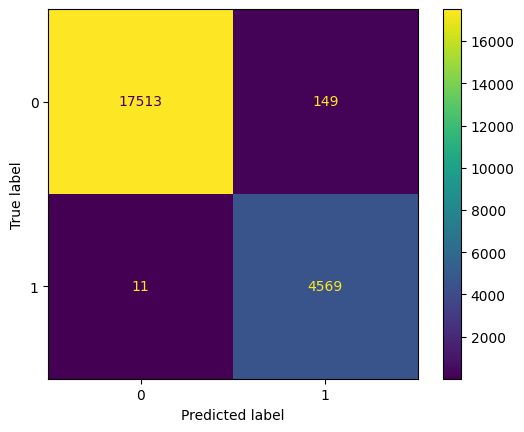

In [130]:
cm_dtr=skl.metrics.confusion_matrix(y_true=y1_test,y_pred=dtr.predict(x1_test))
skl.metrics.ConfusionMatrixDisplay(cm_dtr).plot()

## SVM Binary Classification

In [131]:
print('Train Accuracy',svm.score(x1_train,y1_train))
print('Test Accuracy:',svm.score(x1_test,y1_test))

Train Accuracy 0.9927836789748777
Test Accuracy: 0.9926265623595001


In [132]:
print(skl.metrics.classification_report(y1_test,svm.predict(x1_test),target_names=['Attack','Normal']))

              precision    recall  f1-score   support

      Attack       1.00      0.99      1.00     17662
      Normal       0.97      1.00      0.98      4580

    accuracy                           0.99     22242
   macro avg       0.98      0.99      0.99     22242
weighted avg       0.99      0.99      0.99     22242



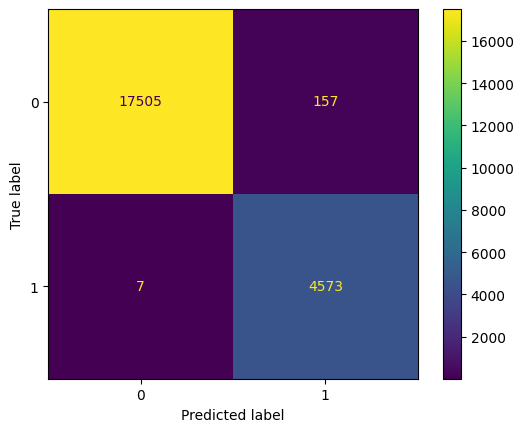

In [133]:
cm_svm=skl.metrics.confusion_matrix(y_true=y1_test,y_pred=svm.predict(x1_test))
skl.metrics.ConfusionMatrixDisplay(cm_svm).plot()

In [134]:
lr=LogisticRegression()
dtr=DecisionTreeClassifier()
svm=SVC(gamma='auto')

lr.fit(x2_train,y2_train.ravel())
dtr.fit(x2_train,y2_train.ravel())
svm.fit(x2_train,y2_train.ravel())


/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVC(gamma='auto')

## Logistic Regression Multi-Classification

In [135]:
print('Train Accuracy',lr.score(x2_train,y2_train))
print('Test Accuracy:',lr.score(x2_test,y2_test))

Train Accuracy 0.904479289608273
Test Accuracy: 0.904055390702275


In [136]:
print(skl.metrics.classification_report(y2_test,lr.predict(x2_test),target_names=['ARP Spoofing','No Attack','Nmap Port Scan','Smurf Attack','DoS Attack']))

                precision    recall  f1-score   support

  ARP Spoofing       0.00      0.00      0.00       460
     No Attack       0.72      0.97      0.83      4580
Nmap Port Scan       0.00      0.00      0.00      1401
  Smurf Attack       0.99      1.00      1.00     15685
    DoS Attack       0.00      0.00      0.00       116

      accuracy                           0.90     22242
     macro avg       0.34      0.39      0.36     22242
  weighted avg       0.85      0.90      0.87     22242



/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


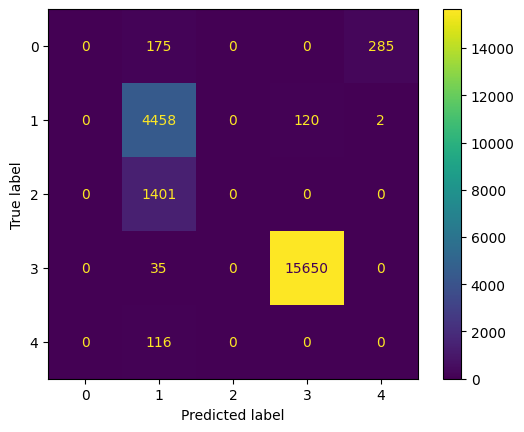

In [137]:
cm_lr=skl.metrics.confusion_matrix(y_true=y2_test,y_pred=lr.predict(x2_test))
skl.metrics.ConfusionMatrixDisplay(cm_lr).plot()

## Decision Tree Multi-class

In [138]:
print('Train Accuracy',dtr.score(x2_train,y2_train))
print('Test Accuracy:',dtr.score(x2_test,y2_test))

Train Accuracy 0.9928286404765919
Test Accuracy: 0.9928064023019513


In [139]:
print(skl.metrics.classification_report(y2_test,dtr.predict(x2_test),target_names=['ARP Spoofing','No Attack','Nmap Port Scan','Smurf Attack','DoS Attack']))

                precision    recall  f1-score   support

  ARP Spoofing       1.00      1.00      1.00       460
     No Attack       0.97      1.00      0.98      4580
Nmap Port Scan       1.00      0.92      0.96      1401
  Smurf Attack       1.00      1.00      1.00     15685
    DoS Attack       0.88      0.64      0.74       116

      accuracy                           0.99     22242
     macro avg       0.97      0.91      0.94     22242
  weighted avg       0.99      0.99      0.99     22242



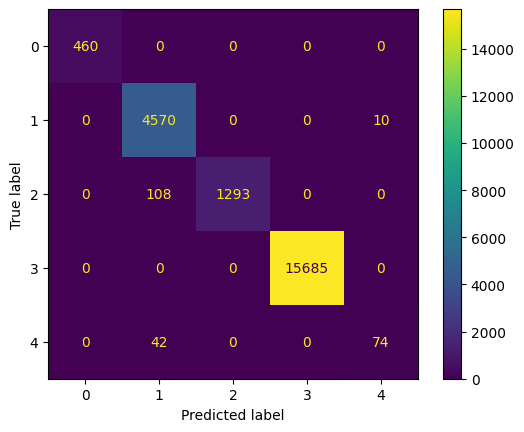

In [140]:
cm_dtr=skl.metrics.confusion_matrix(y_true=y2_test,y_pred=dtr.predict(x2_test))
skl.metrics.ConfusionMatrixDisplay(cm_dtr).plot()

## SVM Multi-class

In [141]:
print('Train Accuracy',svm.score(x2_train,y2_train))
print('Test Accuracy:',svm.score(x2_test,y2_test))

Train Accuracy 0.9927836789748777
Test Accuracy: 0.9926265623595001


In [142]:
print(skl.metrics.classification_report(y2_test,svm.predict(x2_test),target_names=['ARP Spoofing','No Attack','Nmap Port Scan','Smurf Attack','DoS Attack']))

                precision    recall  f1-score   support

  ARP Spoofing       1.00      1.00      1.00       460
     No Attack       0.97      1.00      0.98      4580
Nmap Port Scan       1.00      0.92      0.96      1401
  Smurf Attack       1.00      1.00      1.00     15685
    DoS Attack       0.91      0.61      0.73       116

      accuracy                           0.99     22242
     macro avg       0.98      0.91      0.93     22242
  weighted avg       0.99      0.99      0.99     22242



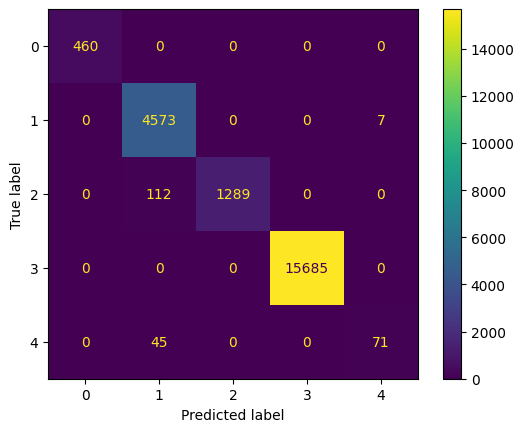

In [143]:
cm_svm=skl.metrics.confusion_matrix(y_true=y2_test,y_pred=svm.predict(x2_test))
skl.metrics.ConfusionMatrixDisplay(cm_svm).plot()